# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Выведем основную информацию о датафрейме.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Выведем первые 20 строк датафрейма.

In [2]:
data.head(20) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим наличие пропущенных значений в рядах данных, а также, предположительно, некорректно заполненные данные.

#### Построение гистрограмм для рядов с числовыми значениями.

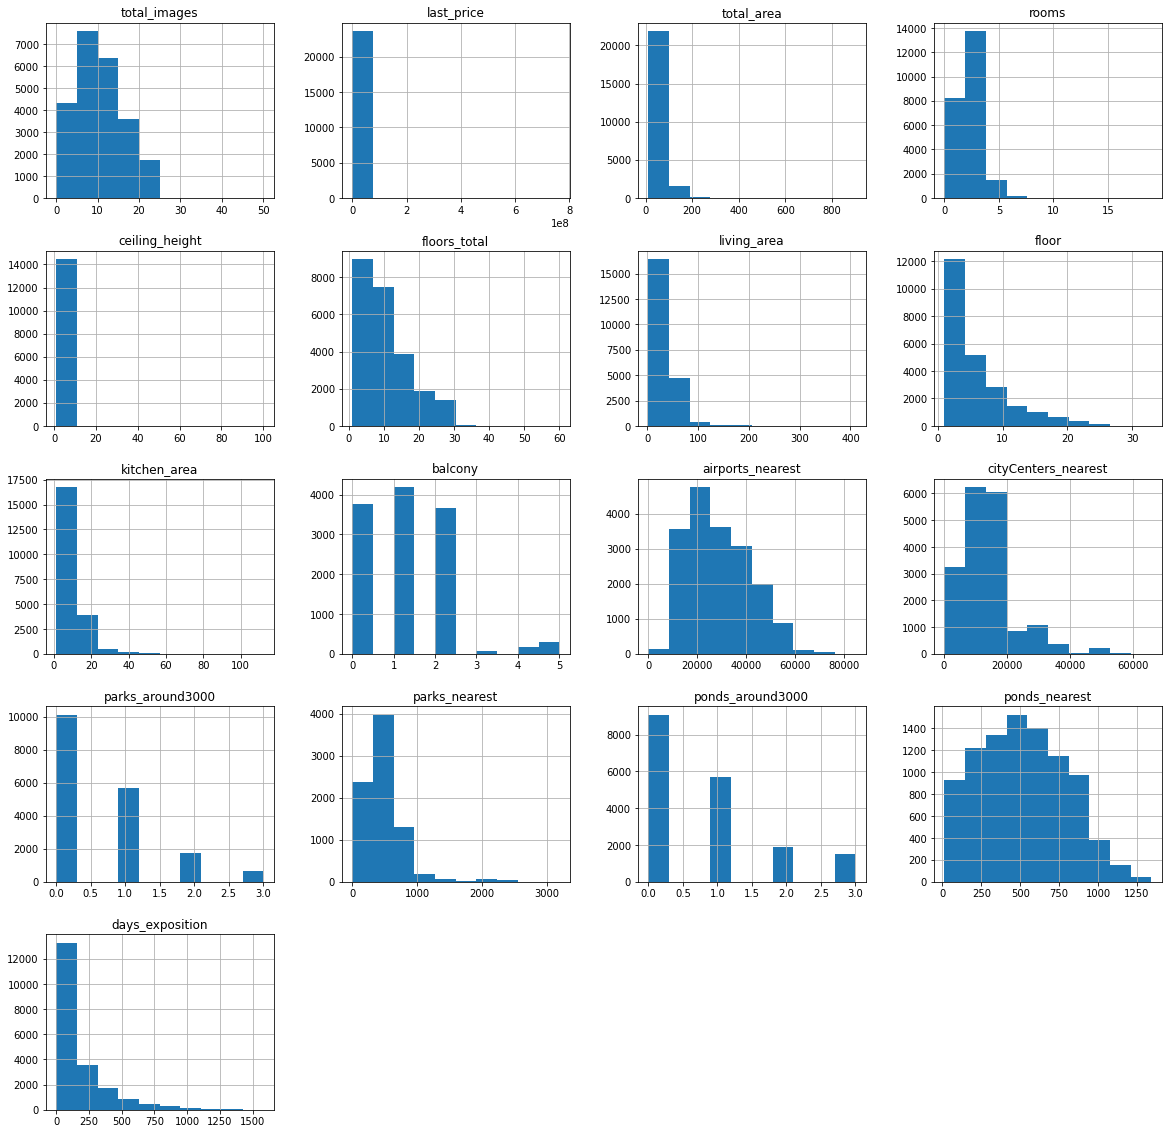

In [4]:
data.hist(figsize=(20, 20));

### Предобработка данных

#### Определение пропусков данных.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполнение пропусков

Предположили, что пропущенные значения числа балконов объясняются отсутствием у квартиры балкона.
Заполним пропуски нулями.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Аналогично поступим с пропусками признака отношения объекта жилой недвижимости к апартаментам: считаем, что отсутствие какого-либо значения свидетельствует о том, что объект не является апартаментами.

In [7]:
data['is_apartment'] =  data['is_apartment'].fillna(False)

Корректно заполнить информацию о названии населенного пункта и общем количестве этажей не представляется возможным. Причинами пропусков значений могло стать отсутствие необхожимости обязательно заполнять эти данные при размещении объявления.  
Доли объявлений с пропущенными данными в этих рядах достаточно малы.

In [8]:
print('Доля пропущенных данных об этажности дома: {:.2%}'.format
      (data['floors_total'].isna().sum()/
      (data['floors_total'].count() + 
      data['floors_total'].isna().sum())))
print('Доля пропущенных данных о населенном пункте: {:.2%}'.format
      (data['locality_name'].isna().sum()/
      (data['locality_name'].count() + 
      data['locality_name'].isna().sum())))

Доля пропущенных данных об этажности дома: 0.36%
Доля пропущенных данных о населенном пункте: 0.21%


При дальнейшей анализе взаимозависимостей информацию из таких объявлений можно не учитывать, что не повлияет на достоверность полученных результатов.  
Кроме того, в датафрейме пропущены значения, получаемы автоматически на основе картографических данных. Корректно заполнить их на данном этапе и при имеющейся информации невозможно.  
Причиной наличия пропусков мог опять же стать человеческий фактор. При несоответствии введенного адреса квартиры унифицированному справочнику автоматический расчет не мог быть произведен. 

In [9]:
# Создадим сводную таблицу. Сгруппируем данные по количеству комнат, 
# в качестве значений возьмем средние значения жилой и общей площадей, площадь кухни.  

data_area_coef = data.pivot_table(index=['rooms'], values=['living_area', 'kitchen_area', 'total_area'])

# Рассчитаем коэффициенты, соответствующие средней доле площади кухни и жилой площади
# в общей площади жилого помещения.

data_area_coef['kitchen_coef'] = data_area_coef['kitchen_area'] / data_area_coef['total_area']
data_area_coef['living_coef'] = data_area_coef['living_area'] / data_area_coef['total_area']

# Удалим ряды, которые нам больше не понадобятся.

data_area_coef = data_area_coef.drop(['kitchen_area', 'living_area', 'total_area'], axis=1)

In [10]:
# Объединим исходный датафрейм и датафрейм с рассчитанными коэффициентами.

data = data.merge(data_area_coef, on='rooms', how='left', suffixes=('kitchen_coef', 'living_coef'))

In [11]:
# Определим расчетную величину жилой площади и площади кухни.

data['living_area_calc'] = data['total_area'] * data['living_coef']
data['kitchen_area_calc'] = data['total_area'] * data['kitchen_coef']

# Заполним пропуски расчетными значениями. 

data['living_area'] = data['living_area'].fillna(data['living_area_calc'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_calc'])

# Удалим из датафрейма ряды, добавленные для дополнительных расчетов. 

data = data.drop(['living_coef', 'kitchen_coef', 'living_area_calc', 'kitchen_area_calc'], axis=1)

Проверим, остались ли в датафрейме пропуски, не затронутые нашими действиями.

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как видим, 197 значений площади кухни не были заполнены. Проверим, в жилых помещениях с каким количеством комнат обнаружены пропуски.

In [13]:
data.loc[data['kitchen_area'].isna()]['rooms'].unique()

array([0])

Пропущенные значения остались для квартир, количество комнат в которых равно 0. Предположим, что такое возможно для жилых помещений с открытой планировкой (в таком случае заполнять площадь кухни некорректно) или для квартир-студий. 

In [14]:
data.loc[((data['kitchen_area'].isna()) & (data['open_plan'] == True))|
         ((data['kitchen_area'].isna()) & (data['studio'] == True))]['kitchen_area'].isna().sum()

197

Проверим, можем ли мы заполнить пропуски для студий.

In [15]:
print(data.loc[(data['studio'] == True)]['kitchen_area'].unique())
print(len(data.loc[((~data['kitchen_area'].isna()) & (data['studio'] == True))]['kitchen_area']))
len(data.loc[(data['studio'] == True)])

[       nan 6.44629112 6.84965999 8.62549776 8.2449611  7.1033511
 7.86442443 7.61073332 5.58120443 5.93637199 6.59596888]
11


149

Для 149 объявлений с квартирами-студиями только для 11 заполнены значения площади кухни, при этом в двух случаях они совпадают. Выявить обоснованную закономерность не представляется возможным, корректно заполнить пропущенные значения при имеющихся данных не удастся. 

Для того, чтобы заполнить пропуски в ряде данных о высоте потолков, удалим неявные дубликаты в названиях населенных пунктов.

#### Удаление неявных дубликатов в названиях населенных пунктов.

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В ряде данных встречаются неявные дубликаты. Избавимся от них.

In [17]:
# Создадим словарь для первого шага обработки неявных повторов.

replace_dict_first = {
    'посёлок': 'поселок',
    'городской поселок': 'поселок городского типа',
    'коттеджный поселок':'поселок',
    'поселок станции': 'поселок'
}

def apply_replace_dict_first(text):
    """
    Фукнция проверяет наличие в строке текста, соответствующего ключу словаря replace_dict_first, 
    и, при совпадении, заменяет его на соответствующие значения словаря
    """
    for key, value in replace_dict_first.items():
        text = text.replace(key, value)
        
    return text

data['locality_name'] = data['locality_name'].astype(str).apply(apply_replace_dict_first)

In [18]:
# Создадим словарь для финальной обработки неявных повторов.

replace_dict_second = {
    'деревня ': '',
    'поселок городского типа ': '',
    'село ': '',
    'поселок ': '',
    'садовое товарищество ': '',
    'садоводческое некоммерческое товарищество ': '',
    'при железнодорожной станции ': '',
    'имени ': '',
}

def apply_replace_dict_second(text):
    """
    Фукнция проверяет наличие в строке текста, соответствующего ключу словаря apply_replace_dict_second, 
    и, при совпадении, заменяет его на соответствующие значения словаря
    """
    for key, value in replace_dict_second.items():
        text = text.replace(key, value)
        
    return text

data['locality_name'] = data['locality_name'].astype(str).apply(apply_replace_dict_second)

In [19]:
data = data.loc[data['locality_name'] != 'nan']

In [20]:
data['locality_name'].sort_values().unique()  # Выводим отсортированные уникальные значения ряда

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Заполним пропуски высоты потолков медианными значениями показателя для каждого населенного пункта. 

In [21]:
data_ceil = data.pivot_table(index=['locality_name'], values='ceiling_height', aggfunc='median')
data = data.merge(data_ceil, on='locality_name', how='left')

In [22]:
data['ceiling_height_x'] = data['ceiling_height_x'].fillna(data['ceiling_height_y'])
data = data.drop(['ceiling_height_y'], axis=1)
data = data.rename(columns={'ceiling_height_x':'ceiling_height'})

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             95
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

В итоге 95 значений остались незаполненными. Это означает, что во всех в объявлениях о продаже жилой недвижимости в этих населенных пунктах не была указана высота потолков, что не позволило расчитать медианное значение этого показателя.  
Заполнять данные пропуски медианным значением по генеральной выборке считаем нецелесообразным, так как в зависимости от периода и особенности застройки высота потолков может существенно отличаться. Отсутствие значения в 95 слуаях считаем практически незначимым.

#### Изменение типов данных

Изменим типы данных там, где это возможно.

In [24]:
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)

Количество балконов в квартире - целочисленное значение, соответственно следует использовать тип данных без плавающей запятой - `int64`. Признак принадлежности к аппартаментам - логический тип, булево значение, а, значит, следует изменить тип данных на `bool`. Ряд с датой размещения объявления говорит сам за себя - изменим тип данных на `datetime64`.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23555 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23453 non-null  float64       
 13  balcony         

Несмотря на то, что количество этажей в доме - это целочисленное значение, мы не стали изменять тип данных этого ряда на `int64`, а оставили `float`. Это связано с необходимостью замены опущенных значений на какой-либо число. На текущем этапе и при имеющемся наборе данных считаем это нецелесообразным. 

#### Устранение аномальных значений

Перед обработкой выбивающихся значений очистим датафрейм от пропусков, заполнить которые не удалось. При этом пропуски в данных, полученных автоматически на основе картографических данных, оставим - их доля достаточно велика, их отсутствие может существенно исказить характеристику генеральной совокупности.  
Данные логического типа и информацию о дате размещения объявления и населенном пункте на данном этапе анализировать тоже не будем.

In [26]:
data = data.loc[(~data['kitchen_area'].isna()) & (~data['ceiling_height'].isna()) & (~data['floors_total'].isna()) ]
display(data.isna().sum())
data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5358
cityCenters_nearest      5335
parks_around3000         5334
parks_nearest           15276
ponds_around3000         5334
ponds_nearest           14311
days_exposition          3134
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23278 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23278 non-null  int64         
 1   last_price            23278 non-null  float64       
 2   total_area            23278 non-null  float64       
 3   first_day_exposition  23278 non-null  datetime64[ns]
 4   rooms                 23278 non-null  int64         
 5   ceiling_height        23278 non-null  float64       
 6   floors_total          23278 non-null  float64       
 7   living_area           23278 non-null  float64       
 8   floor                 23278 non-null  int64         
 9   is_apartment          23278 non-null  bool          
 10  studio                23278 non-null  bool          
 11  open_plan             23278 non-null  bool          
 12  kitchen_area          23278 non-null  float64       
 13  balcony         

##### Total images

Обрабатывать значения ряда данных с количеством изображений не станем, исходя из предположения, что этот показатель скорее влияет на выбор объявления для дальнейшего более близкого ознакомления с вариантом жилой недвижимости.

##### Last_price

In [27]:
data['last_price'].describe()

count    2.327800e+04
mean     6.586340e+06
std      1.095970e+07
min      1.219000e+04
25%      3.469400e+06
50%      4.670000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Медианная стоимость объекта недвижимости составляет 4,68 млн рублей, при этом максимальная - 763 млн рублей. 

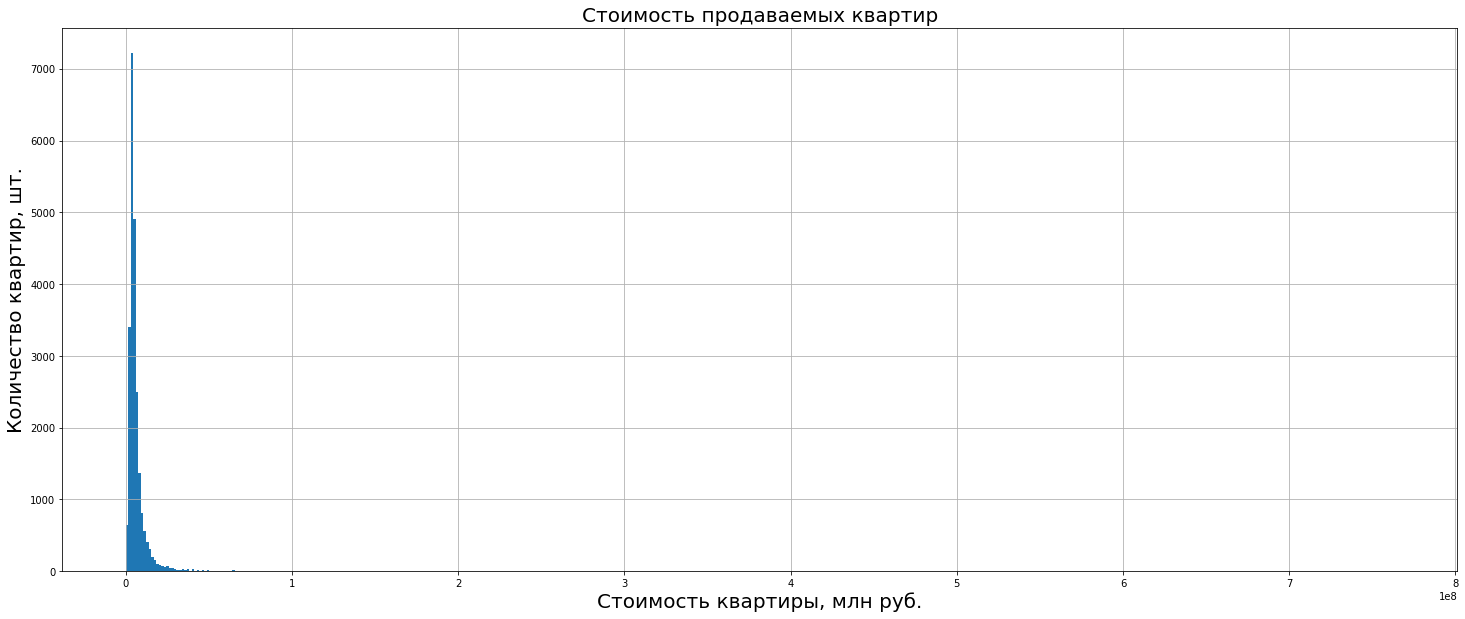

In [28]:
data.hist('last_price', figsize=(25, 10), bins=500);
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Стоимость продаваемых квартир', fontsize = 20);

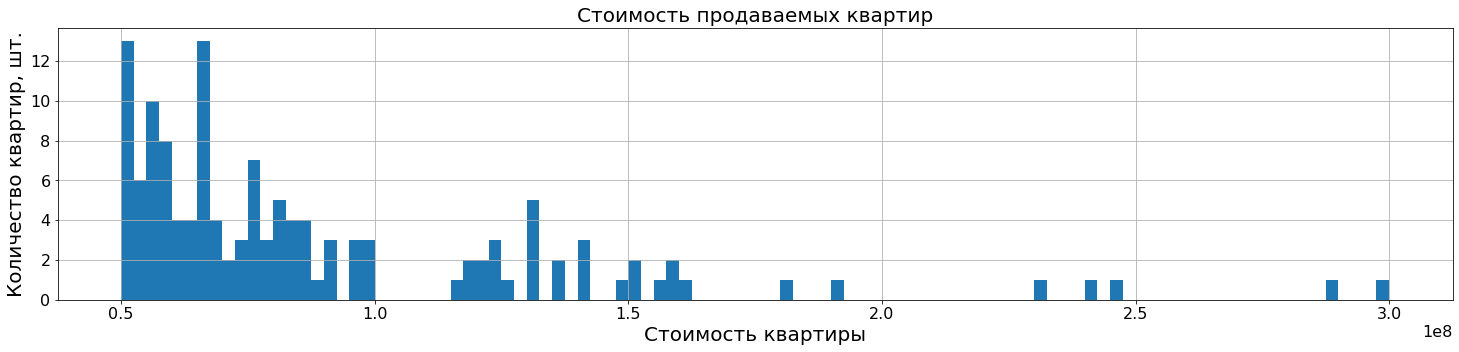

In [29]:
data.hist('last_price', figsize=(25, 5), bins=100, range=(50000000, 300000000));
plt.xlabel('Стоимость квартиры', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Стоимость продаваемых квартир', fontsize = 20);

Мы видим, что количество объектов недвижимости со стоимостью свыше 75 млн рублей встречаются достаточно редко, поэтому исключим их из выборки.
Однако, есть объекты недвижимости с достаточно низкой стоимостью.

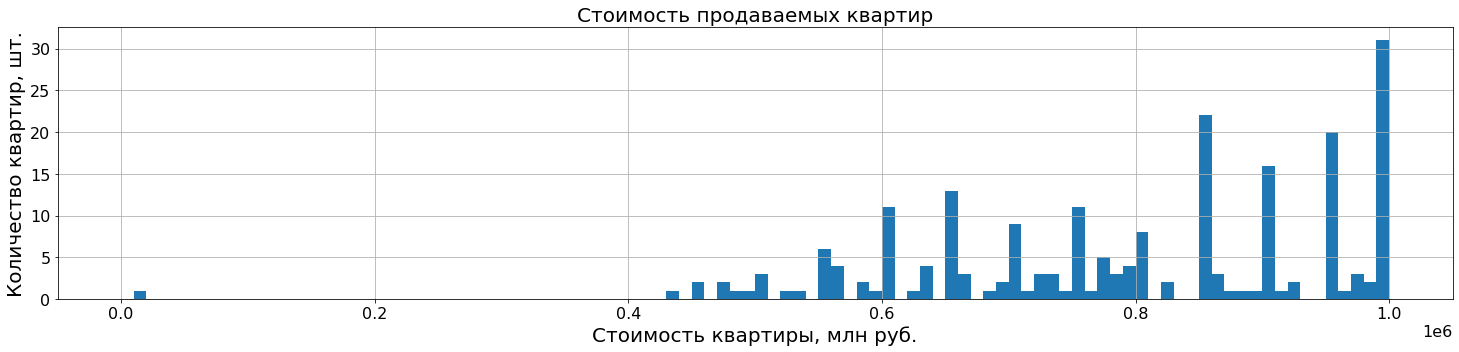

In [30]:
data.hist('last_price', figsize=(25, 5), bins=100, range=(0, 1000000));
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Стоимость продаваемых квартир', fontsize = 20);

In [31]:
data = data.loc[(400000 < data['last_price'])&(data['last_price'] < 75000001)]
data['last_price'].describe()

count    2.321000e+04
mean     6.188617e+06
std      5.770538e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.500000e+07
Name: last_price, dtype: float64

Несмотря на наши преобразования, имеем достаточно высокое значение стандартного отклонения и превышение среднего значения над медианным. Тем не менее, считаем, что дальнейшее "отсеисвание" значений может исказить результаты, так как стоимость квартир в самом Санкт-Петербурге существенно превышает аналогичный показатель для других населенных пунктов. 

##### Total_area

In [32]:
data['total_area'].describe()

count    23210.000000
mean        59.941036
std         32.451301
min         12.000000
25%         40.100000
50%         52.000000
75%         69.800000
max        590.000000
Name: total_area, dtype: float64

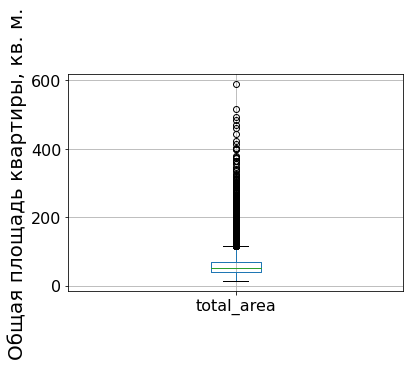

In [33]:
data.boxplot('total_area');
plt.ylabel('Общая площадь квартиры, кв. м.', fontsize = 20);

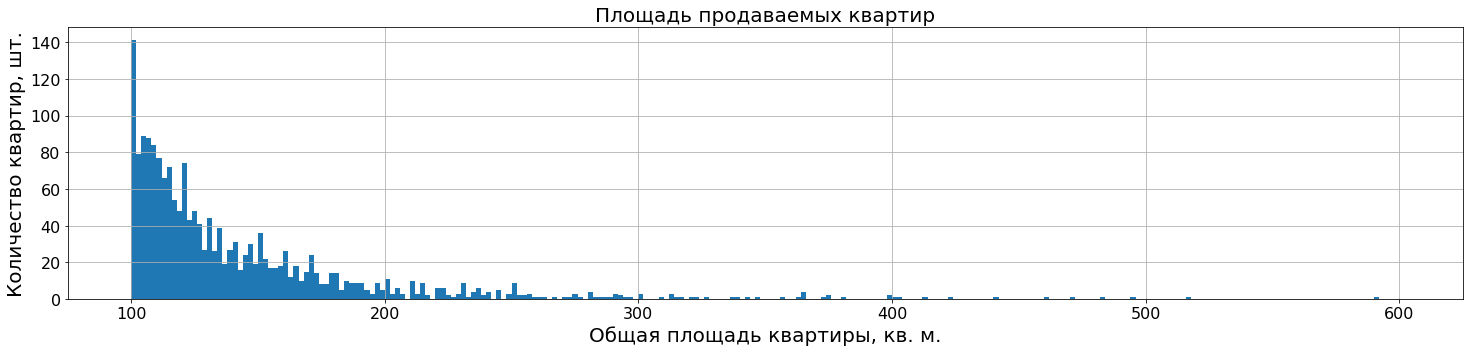

In [34]:
data.hist('total_area', figsize=(25, 5), bins=250, range=(100, 600));
plt.xlabel('Общая площадь квартиры, кв. м.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Площадь продаваемых квартир', fontsize = 20);

Согласно диаграмме размаха значения больше 100 считаются аномальными. В то же время гистограмма позволяет обратить внимание на то, что значения общей площади до 200 встречаются относительно часто. Будем считать аномальными значения свыше 200 кв. м.

In [35]:
data = data.loc[data['total_area'] <= 200]

In [36]:
data['total_area'].describe()

count    23035.000000
mean        58.365133
std         26.346349
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

##### Rooms

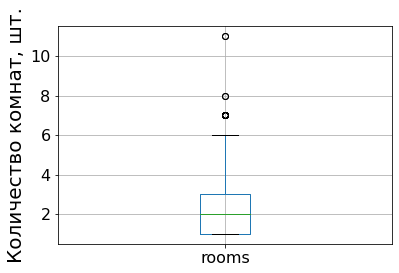

In [37]:
data.boxplot('rooms');
plt.ylabel('Количество комнат, шт.', fontsize = 20);

Видим единичные выбросы (квартиры с числом комнат более 6). Устраним их.

In [38]:
data = data.loc[data['rooms'] <= 6]
data['rooms'].describe()

count    23011.000000
mean         2.045500
std          0.966752
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

##### Ceiling_height

In [39]:
data['ceiling_height'].describe()

count    23011.000000
mean         2.726296
std          1.000589
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Предположим, что высота потолков, превышающая 20 метров, является ошибкой и при вводе данных была несоблюдена разрядность. Одновременно предположим, что потолки ниже 2 м - ошибка, установить причины которой невозможно, а значит просто уберем эти значения из датафрейма.

In [40]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
data = data.loc[data['ceiling_height'] >= 2]
data['ceiling_height'].describe()

count    23008.000000
mean         2.700072
std          0.247183
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

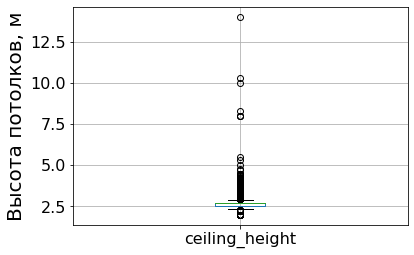

In [41]:
data.boxplot('ceiling_height');
plt.ylabel('Высота потолков, м', fontsize = 20);

Считаем, что потолки выше 3.5 м встречаются 

In [42]:
data = data.loc[data['ceiling_height'] <= 3.5]

В соответствии с действовавшими ранее строительными нормами и правилами (СНиП) высота потолков в жилых помещениях должна быть не меньше 2.5 метров. При этом при строительстве частного дома высота может отличаться. 

In [43]:
data = data.loc[~((data['ceiling_height'] < 2.5)&(data['floors_total'] > 2))]

##### Floors_total

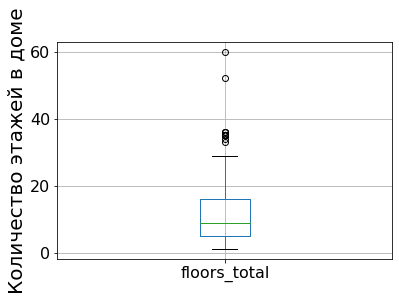

In [44]:
data.boxplot('floors_total');
plt.ylabel('Количество этажей в доме', fontsize = 20);

Видим единичные выбросы. При этом необходимо проверить, в каких городах они наблюдаются.

In [45]:
data.loc[data['floors_total'] > 30]['locality_name'].unique()


array(['Санкт-Петербург', 'Кронштадт'], dtype=object)

Если высота домов выше 30 этажей для Санкт-Петербурга вполне возможна, то для Кронштадта это выглядит как ошибка, так как вся территория города расположена в границах зон охраны объектов культурного наследия, что накладывает ограничения на условия нового строительства, в том числе на максимальную высоту зданий – не более 15 метров. 

In [46]:
data = data.loc[~((data['floors_total'] > 30)&(data['locality_name'] == 'Кронштадт'))]

##### Living_area

In [47]:
data['living_area'].describe()

count    22696.000000
mean        33.084892
std         17.014972
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

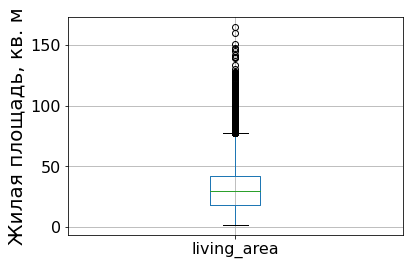

In [48]:
data.boxplot('living_area');
plt.ylabel('Жилая площадь, кв. м', fontsize = 20);

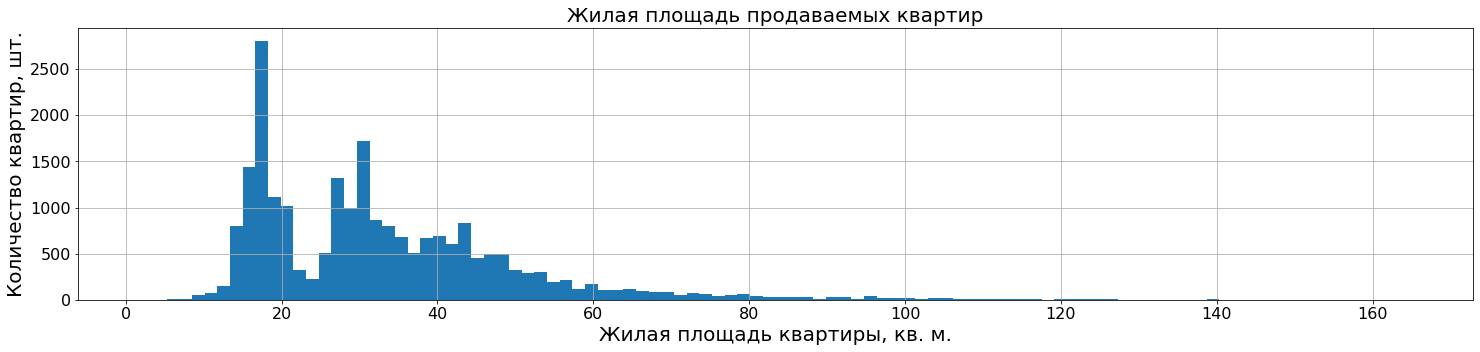

In [49]:
data.hist('living_area', figsize=(25, 5), bins = 100);
plt.xlabel('Жилая площадь квартиры, кв. м.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Жилая площадь продаваемых квартир', fontsize = 20);

Квартиры с жилой площадью меньше 8 кв. м и больше 100 кв. м встречаются достаточно редко.

In [50]:
data = data.loc[(data['living_area'] > 8)&(data['living_area'] < 100)]

##### Floor

In [51]:
data['floor'].describe()

count    22521.000000
mean         5.917943
std          4.887365
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

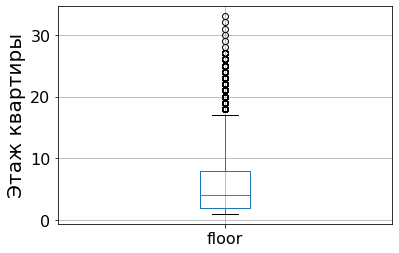

In [52]:
data.boxplot('floor');
plt.ylabel('Этаж квартиры', fontsize = 20);

Несмотря на то, что присутствуют значения, выходящие за 1.5 межквартильного размаха, не станем исключать их из датафрейма, так как они могут быть не ошибочными.

##### Kitchen_area 

In [53]:
data['kitchen_area'].describe()

count    22521.000000
mean        10.240235
std          5.003467
min          1.300000
25%          7.100000
50%          9.080000
75%         11.600000
max         93.000000
Name: kitchen_area, dtype: float64

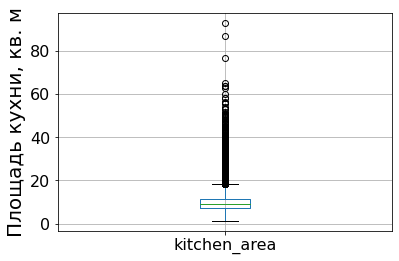

In [54]:
data.boxplot('kitchen_area');
plt.ylabel('Площадь кухни, кв. м', fontsize = 20);

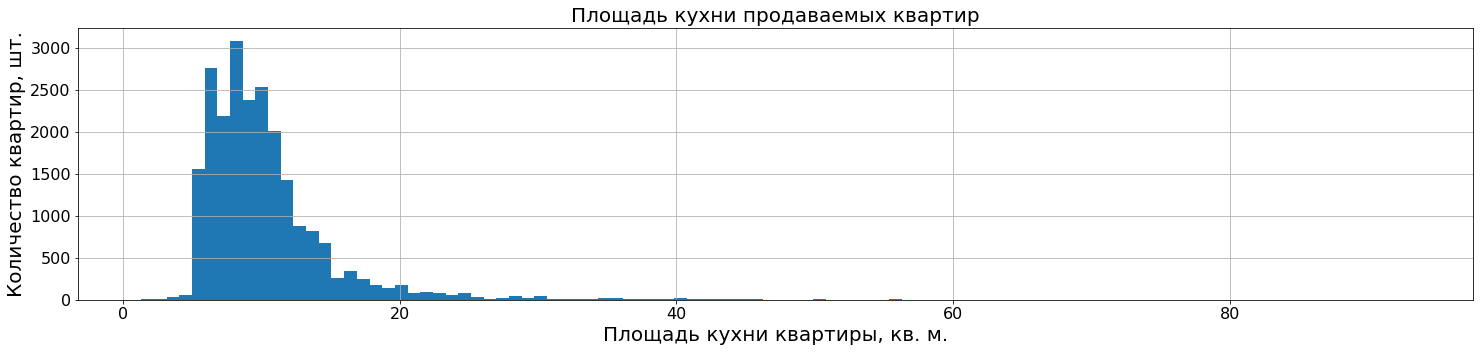

In [55]:
data.hist('kitchen_area', figsize=(25, 5), bins = 100);
plt.xlabel('Площадь кухни квартиры, кв. м.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Площадь кухни продаваемых квартир', fontsize = 20);

Видим, что площадь кухни свыше 30 квадратных метров встречается все реже. Отсечем эти значения из датафрейма.

In [56]:
data = data.loc[data['kitchen_area'] <= 30]

##### Balcony 

In [57]:
data['balcony'].describe()

count    22293.000000
mean         0.597183
std          0.960430
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

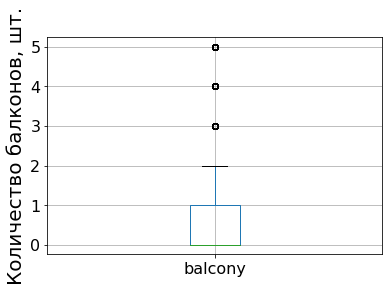

In [58]:
data.boxplot('balcony');
plt.ylabel('Количество балконов, шт.', fontsize = 20);

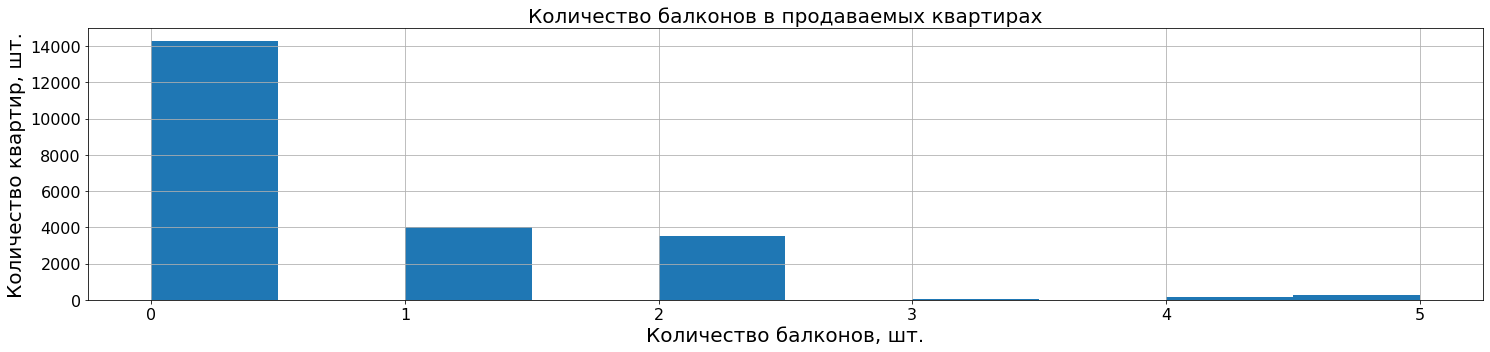

In [59]:
data.hist('balcony', figsize=(25, 5));
plt.xlabel('Количество балконов, шт.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Количество балконов в продаваемых квартирах', fontsize = 20);

In [60]:
data = data.loc[data['balcony'] < 3]

Убрали из датафрейма значения, выходящие за 1.5 межквартильного размаха.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [61]:
data['sqare_meter_price'] = data['last_price'] / data['total_area'] # Рассчитали стоимость одного квадратного метра
data['sqare_meter_price'] = data['sqare_meter_price'].round(2) # Округлили полученное значение до 2 знаков после запятой

#### День публикации объявления

In [62]:
data['expositions_day'] = data['first_day_exposition'].dt.weekday # Добавили необходимый столбец

#### Месяц публикации объявления

In [63]:
data['expositions_month'] = data['first_day_exposition'].dt.month # Добавили необходимый столбец

#### Год публикации объявления

In [64]:
data['expositions_year'] = data['first_day_exposition'].dt.year # Добавили необходимый столбец

#### Тип этажа квартиры

In [65]:
data['floor_type'] = data['floor'] # Добавили в датафрейм новый ряд
data.loc[data['floor_type'] == 1, 'floor_type'] = 'Первый' # Заменили значение первого этажа
data.loc[data['floor_type'] == data['floors_total'], 'floor_type'] = 'Последний' # Заменили значение второго этажа
data.loc[(data['floor_type'] != 'Последний') & (data['floor_type'] != 'Первый'), 'floor_type'] = 'Другой' # Заменили значение остальных этаже

#### Расстояние в км до центра города

In [66]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest'] / 1000 # Добавили ряд с нужными данными 
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].round(2) # Округлили до 2 знаков после запятой

### Проведите исследовательский анализ данных

#### Общая площадь

count    21766.000000
mean        56.064512
std         22.911949
min         12.000000
25%         40.000000
50%         50.500000
75%         66.400000
max        198.000000
Name: total_area, dtype: float64

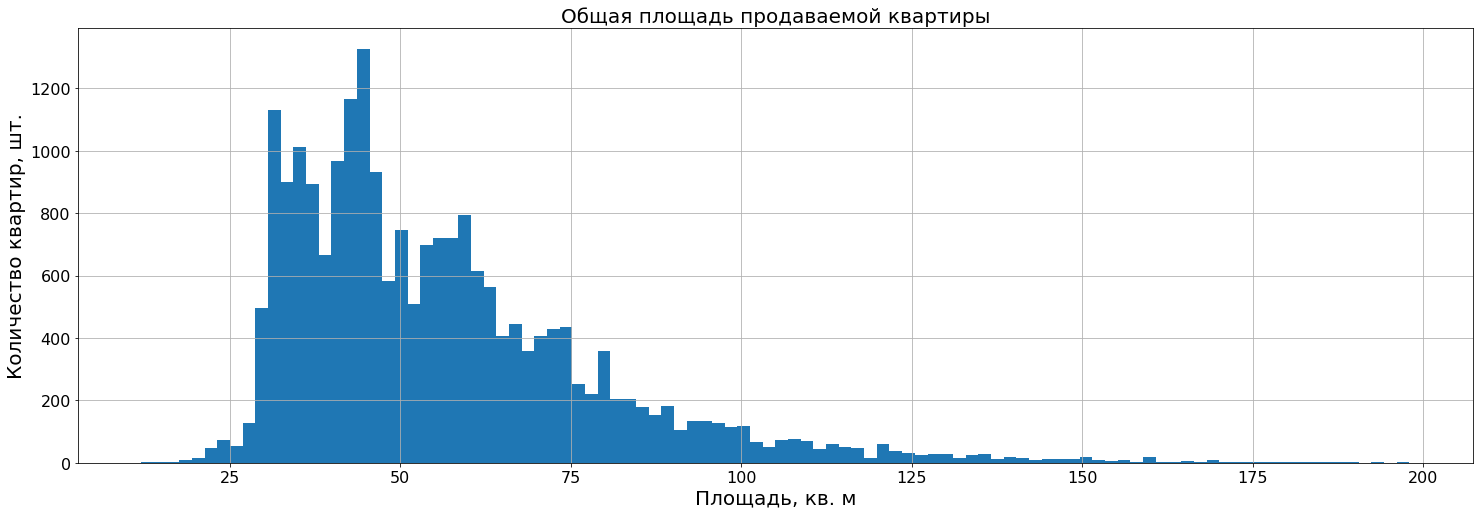

In [67]:
display(data['total_area'].describe())
data.hist('total_area', figsize=(25, 8), bins = 100);
plt.xlabel('Площадь, кв. м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Общая площадь продаваемой квартиры', fontsize = 20);

Средняя общая площадь продаваемых квартир составляет 56,06 кв. м, при этом минимальное и максимальное значение общей площади составляет 12 и 198 кв. м соответственно. В то же время в 75% объявлений общая площадь жилого помещения не превышает 66,4 кв. м.

#### Жилая площадь

count    21766.000000
mean        32.046623
std         15.329323
min          8.175635
25%         18.500000
50%         29.932064
75%         41.000000
max         99.700000
Name: living_area, dtype: float64

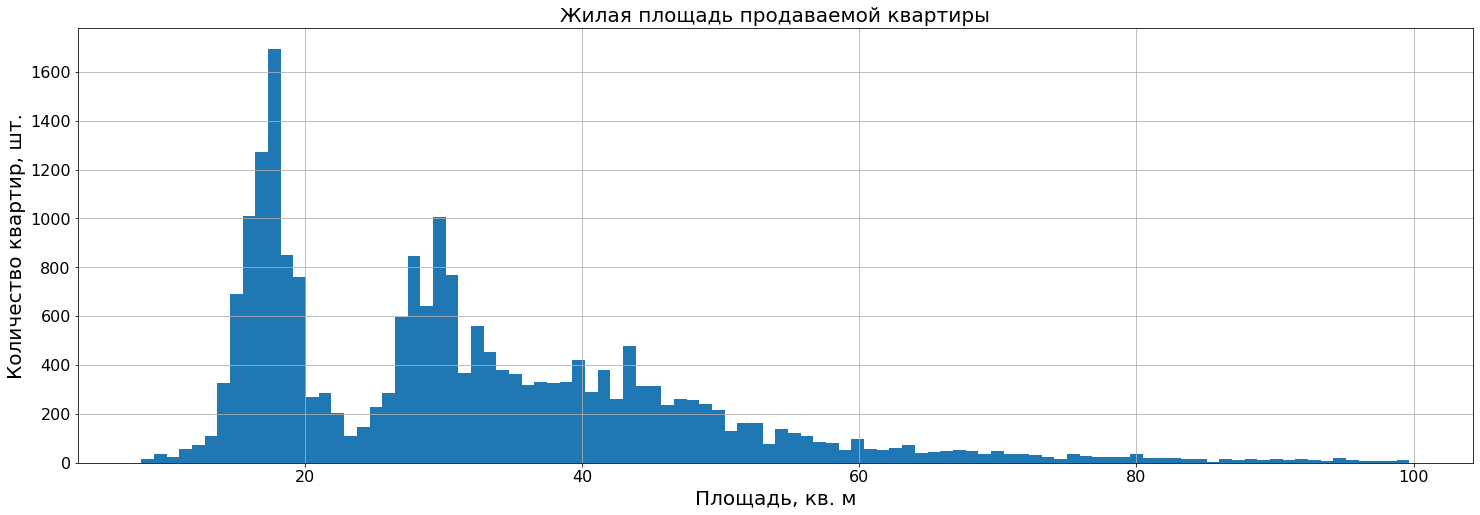

In [68]:
display(data['living_area'].describe())
data.hist('living_area', figsize=(25, 8), bins = 100);
plt.xlabel('Площадь, кв. м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Жилая площадь продаваемой квартиры', fontsize = 20);

Средняя жилая площадь продаваемых квартир составляет 32,05 кв. м, при этом минимальное и максимальное значение жилой площади составляет 8,18 и 99,7 кв. м соответственно. В то же время в 75% объявлений жилая площадь жилого помещения не превышает 41 кв. м.

#### Площадь кухни

count    21766.000000
mean         9.890451
std          3.883299
min          1.300000
25%          7.000000
50%          9.000000
75%         11.348874
max         30.000000
Name: kitchen_area, dtype: float64

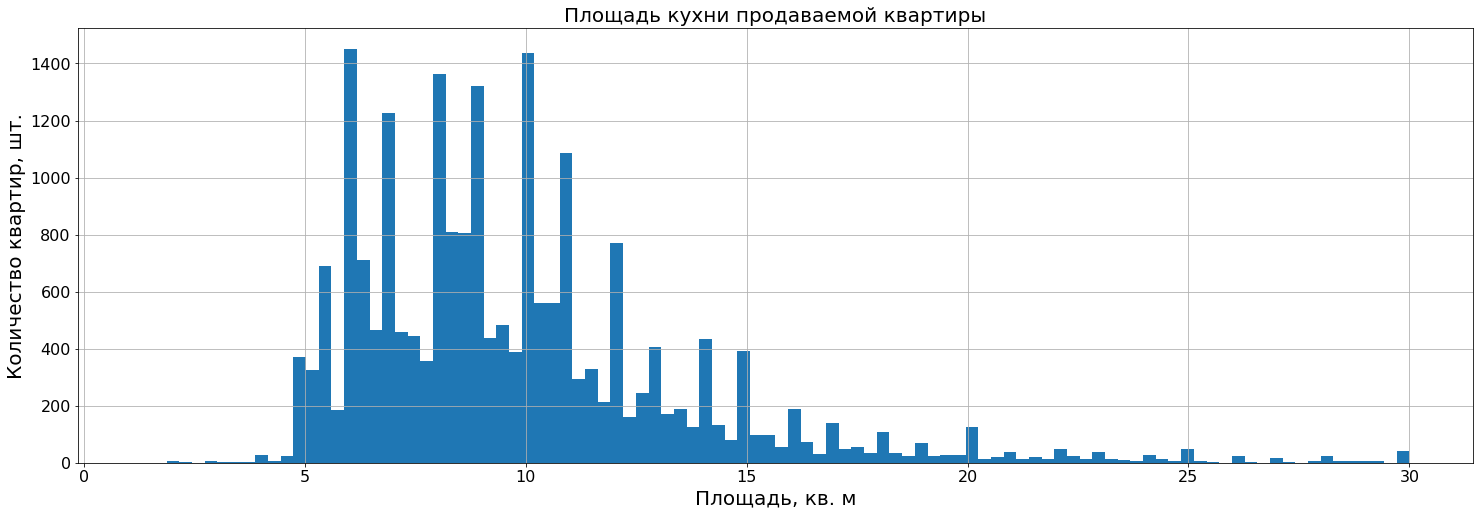

In [69]:
display(data['kitchen_area'].describe())
data.hist('kitchen_area', figsize=(25, 8), bins = 100);
plt.xlabel('Площадь, кв. м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Площадь кухни продаваемой квартиры', fontsize = 20);

Средняя площадь кухни продаваемых квартир составляет 9,89 кв. м, при этом минимальное и максимальное значение площади кухни составляет 1,3 и 30 кв. м соответственно. В то же время в 75% объявлений общая площадь жилого помещения не превышает 11,35 кв. м.

#### Цена объекта

count    2.176600e+04
mean     5.585648e+06
std      4.273363e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.400000e+06
max      7.237500e+07
Name: last_price, dtype: float64

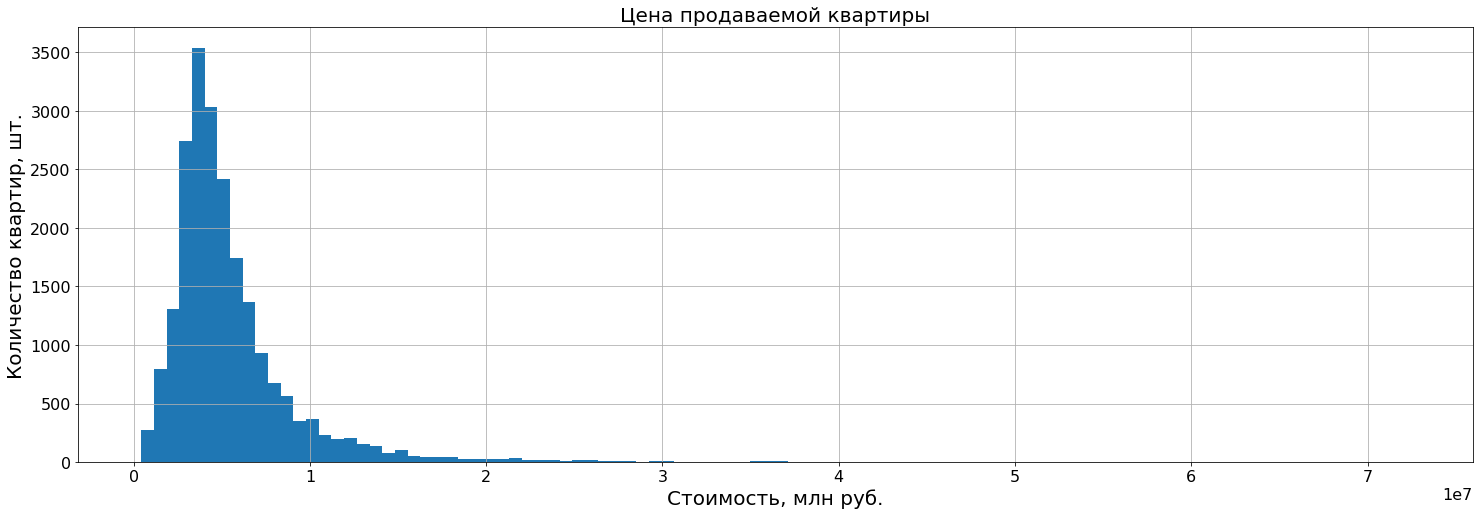

In [70]:
display(data['last_price'].describe())
data.hist('last_price', figsize=(25, 8), bins = 100);
plt.xlabel('Стоимость, млн руб.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Цена продаваемой квартиры', fontsize = 20);

Средняя стоимость продаваемых квартир составляет 5,6 млн руб., при этом минимальное и максимальное значение стоимости составляет 4,3 и 72,4 млн руб. соответственно. В то же время в 75% объявлений общая площадь жилого помещения не превышает 6,4 млн руб.

#### Количество комнат

count    21766.000000
mean         1.994625
std          0.929007
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

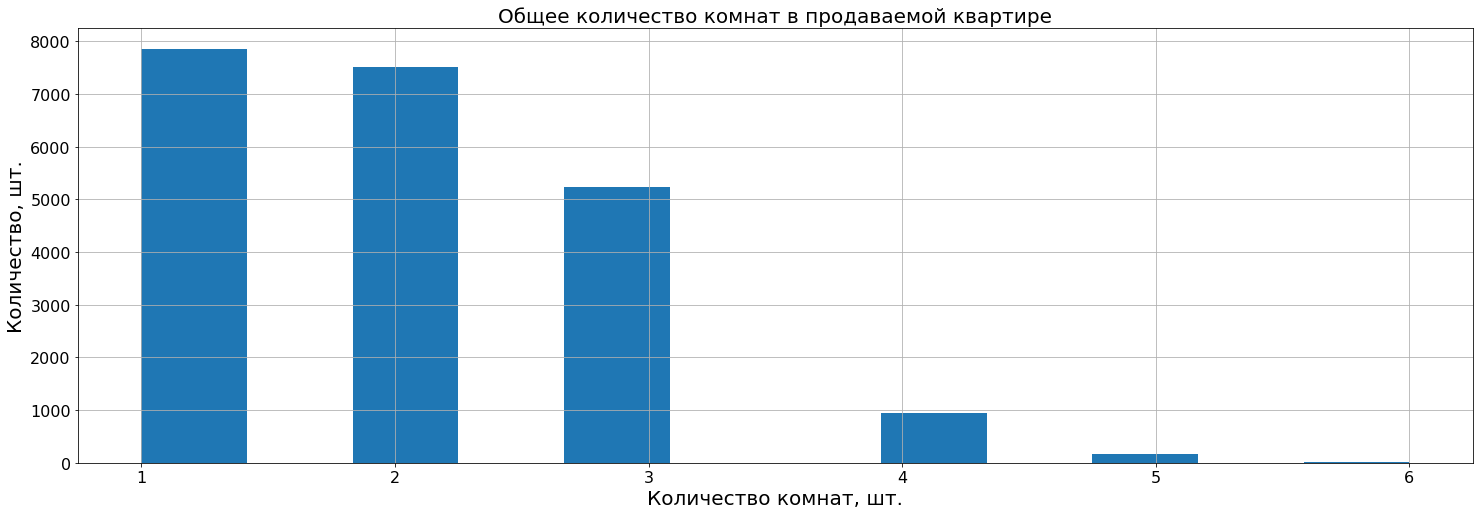

In [71]:
display(data['rooms'].describe())
data.hist('rooms', figsize=(25, 8), bins = 12);
plt.xlabel('Количество комнат, шт.', fontsize = 20);
plt.ylabel('Количество, шт.', fontsize = 20);
plt.title('Общее количество комнат в продаваемой квартире', fontsize = 20);

Среднее количество комнат в продаваемых квартирах составляет 2 шт., при этом минимальное и максимальное значение комнат составляет 1 и 6 шт. соответственно. В то же время в 75% объявлений количество комнат не превышает 3 шт.

#### Высота потолков

count    21766.000000
mean         2.682351
std          0.172553
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

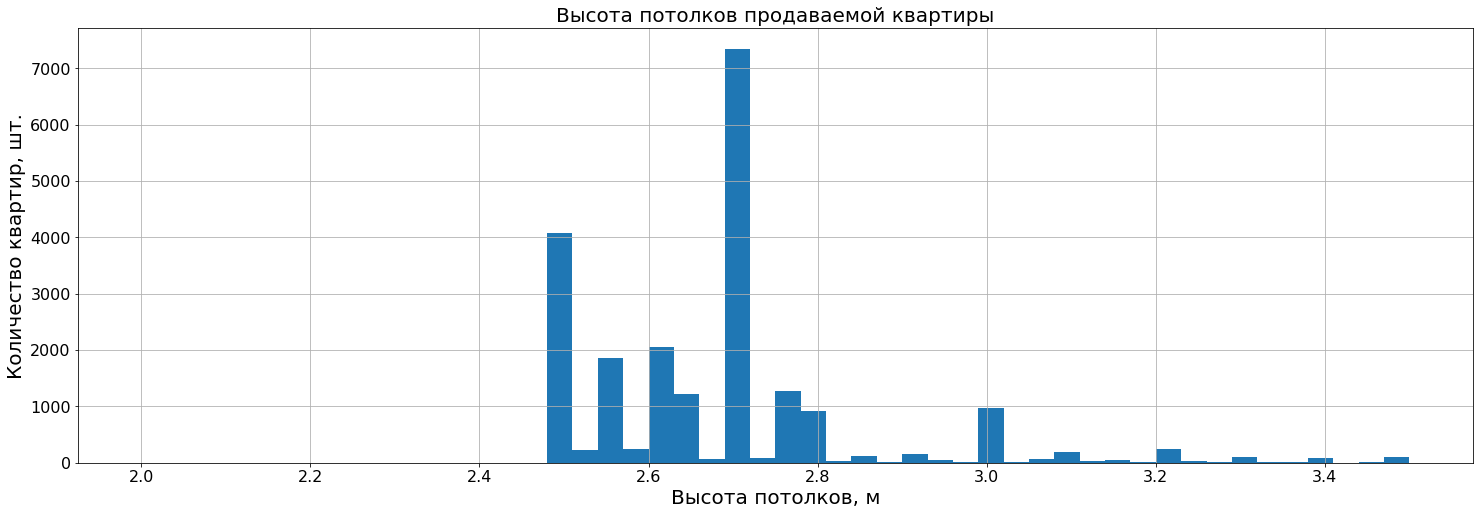

In [72]:
display(data['ceiling_height'].describe())
data.hist('ceiling_height', figsize=(25, 8), bins = 50);
plt.xlabel('Высота потолков, м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Высота потолков продаваемой квартиры', fontsize = 20);

Средняя высота потолков продаваемых квартир составляет 2,68 м, при этом минимальное и максимальное значение высоты потолков составляет 2 и 3,5 м соответственно. В то же время в 75% объявлений высота потолков не превышает 2,7 м.

#### Этаж квартиры

count    21766.000000
mean         5.873656
std          4.864809
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

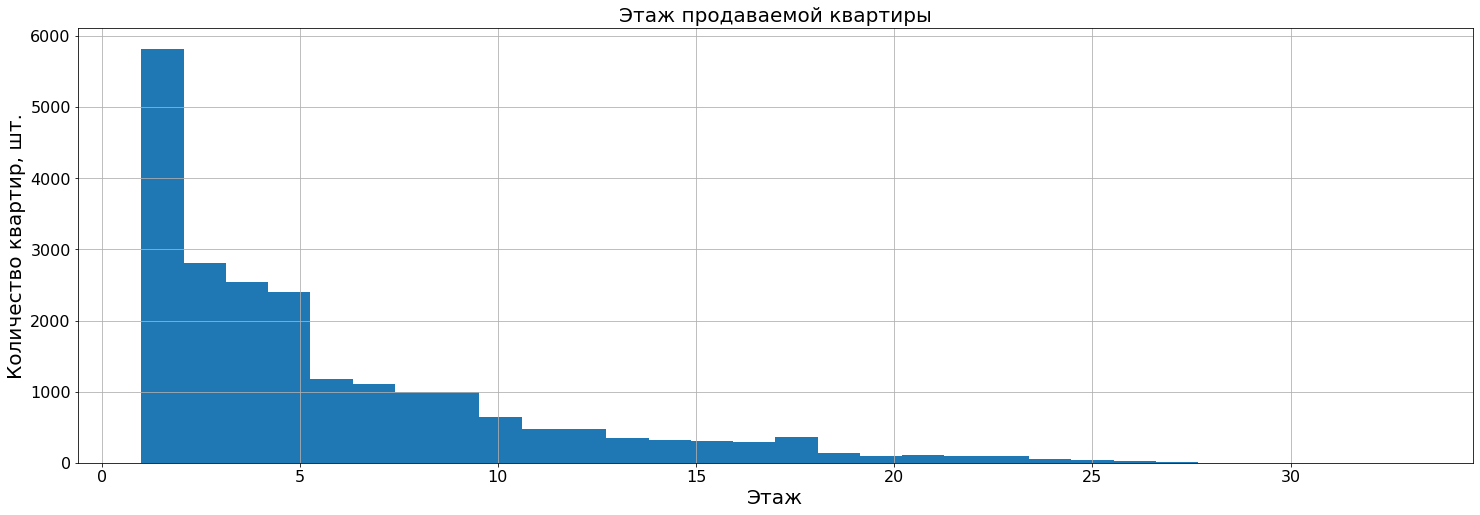

In [73]:
display(data['floor'].describe())
data.hist('floor', figsize=(25, 8), bins = 30);
plt.xlabel('Этаж', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Этаж продаваемой квартиры', fontsize = 20);

В среднем продаваемые квартиры расположены на 6 этаже, при этом минимальное и максимальное значение составляет 1 и 33 этажи соответственно. В то же время в 75% объявлений этаж, на котором расположено жилое помещение, не превышает 8.

#### Тип этажа квартиры («первый», «последний», «другой»)

count      21766
unique         3
top       Другой
freq       16010
Name: floor_type, dtype: object

Другой       16010
Последний     3006
Первый        2750
Name: floor_type, dtype: int64

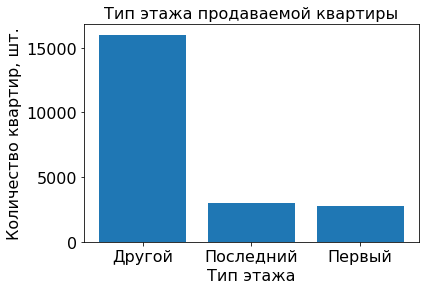

In [74]:
display(data['floor_type'].describe())
data_floor_type = data['floor_type'].value_counts()
display(data_floor_type)
value = (16010, 3006, 2750)
position = (1, 2, 3)
fig, ax = plt.subplots()
ax.bar(position, value)
ax.set_xticks(position)
ax.set_xticklabels(['Другой', 'Последний', 'Первый']);
plt.xlabel('Тип этажа', fontsize = 16);
plt.ylabel('Количество квартир, шт.', fontsize = 16);
plt.title('Тип этажа продаваемой квартиры', fontsize = 16);

Доли квартир, располагающихся на первом и последнем этажах, примерно равны и составляют 12,63% и 13,81% соответственно. Основная часть квартрир расположена на других этажах - их доля составляет 73,56%.

#### Общее количество этажей в доме

count    21766.000000
mean        10.742029
std          6.582459
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

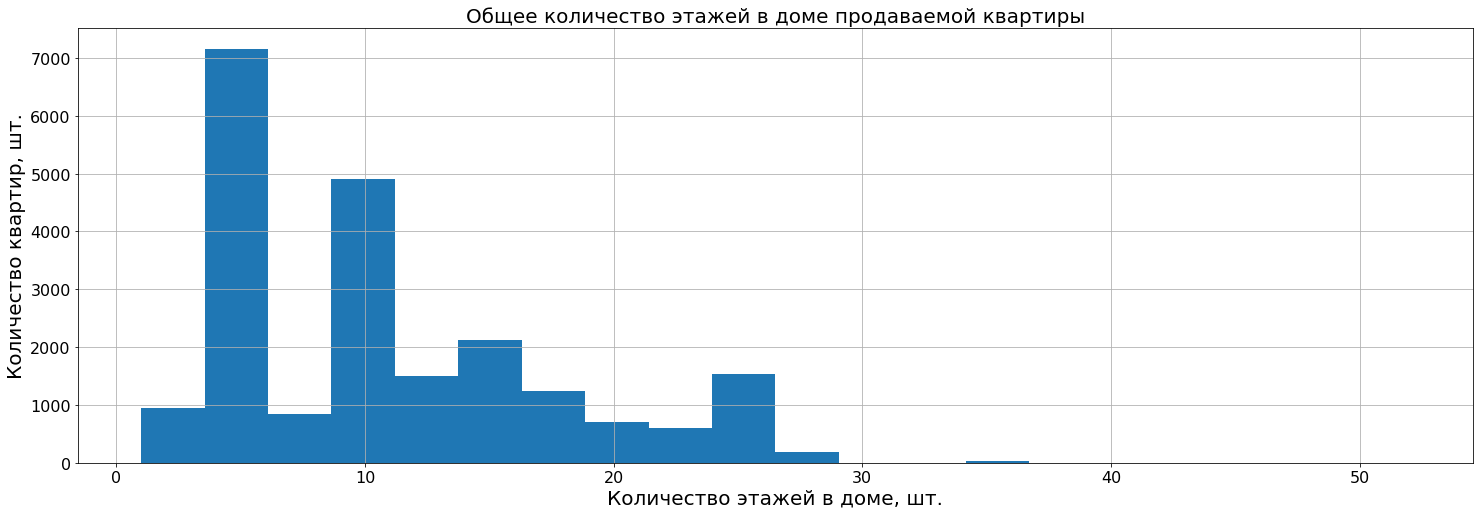

In [75]:
display(data['floors_total'].describe())
data.hist('floors_total', figsize=(25, 8), bins = 20);
plt.xlabel('Количество этажей в доме, шт.', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Общее количество этажей в доме продаваемой квартиры', fontsize = 20);

Среднее количество этажей в доме продаваемых квартир составляет 11, при этом минимальное и максимальное значение этажей составляет 1 и 52 соответственно. В то же время в 75% объявлений количество этажей в доме не превышает 16.

#### Расстояние до центра города в метрах

count    16622.000000
mean     14519.075442
std       8552.410747
min        287.000000
25%       9841.000000
50%      13277.000000
75%      16453.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

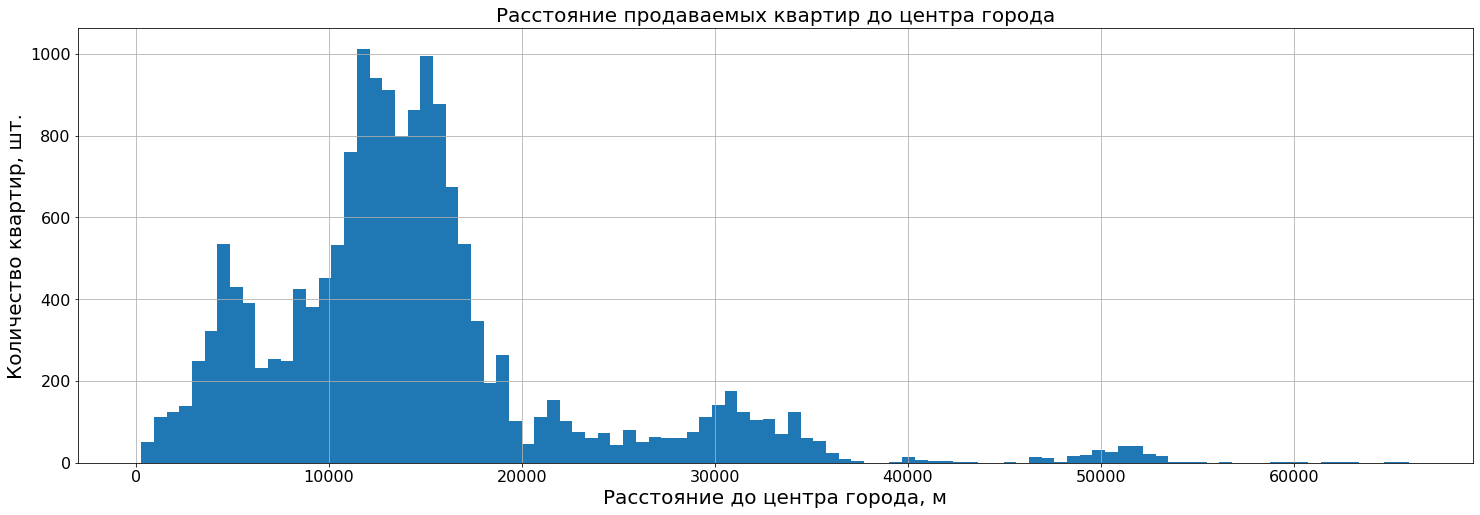

In [76]:
display(data['cityCenters_nearest'].describe())
data.hist('cityCenters_nearest', figsize=(25, 8), bins = 100);
plt.xlabel('Расстояние до центра города, м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Расстояние продаваемых квартир до центра города', fontsize = 20);

Информация о расстоянии продаваемых квартир до центра города присутствует для 16622 объявлений, что соответствует 76% значений генеральной выборки. Среднее расстояние продаваемых квартир до центра города составляет 14519 м, при этом минимальное и максимальное расстояние составляет 287 и 65968 м соответственно. В то же время в 75% объявлений расстояние до центра города не превышает 16453 м.

#### Расстояние до ближайшего аэропорта

count    16602.000000
mean     28883.448801
std      12784.244514
min          0.000000
25%      18376.250000
50%      27016.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

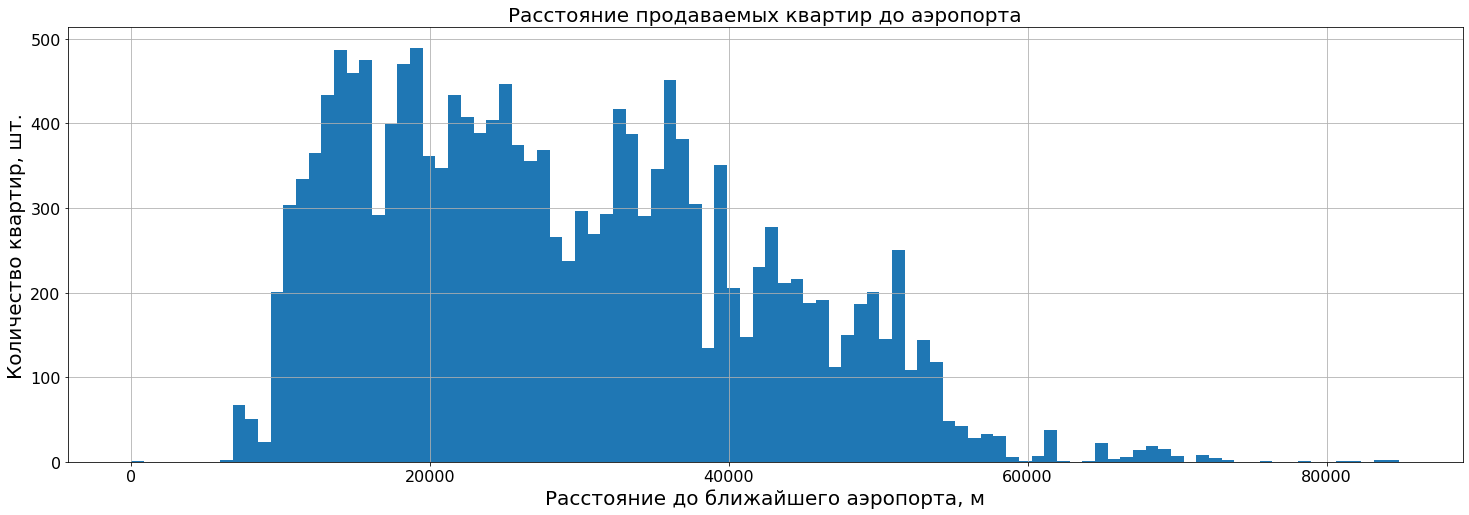

In [77]:
display(data['airports_nearest'].describe())
data.hist('airports_nearest', figsize=(25, 8), bins = 100);
plt.xlabel('Расстояние до ближайшего аэропорта, м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Расстояние продаваемых квартир до аэропорта', fontsize = 20);

Информация о расстоянии продаваемых квартир до аэропорта присутствует для 16602 объявлений, что соответствует 76% значений генеральной выборки. Среднее расстояние продаваемых квартир до аэропорта составляет 28883 м, при этом минимальное и максимальное расстояние составляет 0 и 84869 м соответственно. В то же время в 75% объявлений расстояние до аэропорта не превышает 37434 м.

#### Расстояние до ближайшего парка

count    7194.000000
mean      493.619683
std       344.096260
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

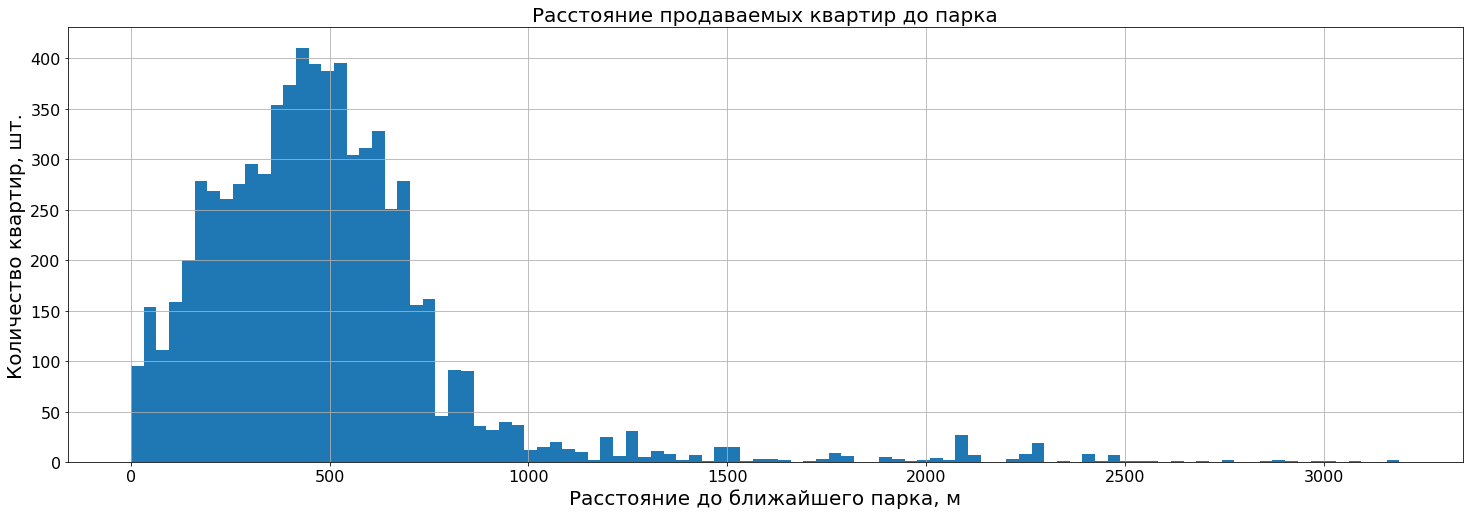

In [78]:
display(data['parks_nearest'].describe())
data.hist('parks_nearest', figsize=(25, 8), bins = 100);
plt.xlabel('Расстояние до ближайшего парка, м', fontsize = 20);
plt.ylabel('Количество квартир, шт.', fontsize = 20);
plt.title('Расстояние продаваемых квартир до парка', fontsize = 20);

Информация о расстоянии продаваемых квартир до ближайшего парка присутствует для 7194 объявлений, что соответствует 33% значений генеральной выборки. Среднее расстояние продаваемых квартир до парка составляет 494 м, при этом минимальное и максимальное расстояние составляет 1 и 3190 м соответственно. В то же время в 75% объявлений расстояние до парка не превышает 614 м.

#### День и месяц публикации объявления

count    21766.000000
mean         6.405173
std          3.490526
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: expositions_month, dtype: float64

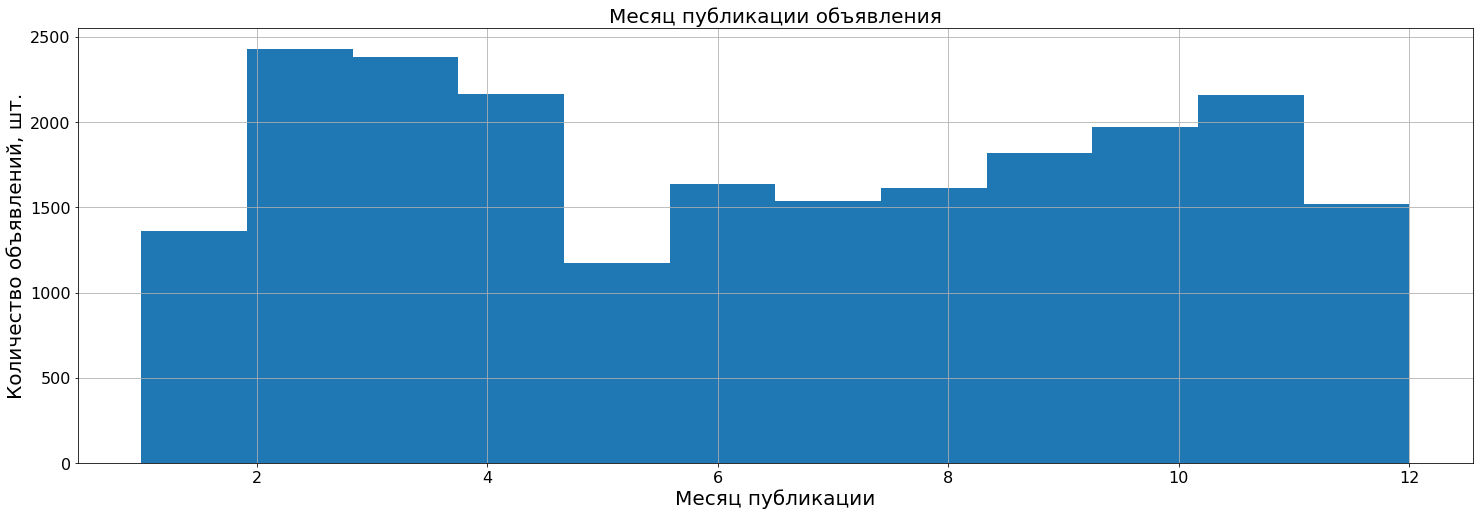

In [79]:
display(data['expositions_month'].describe())
data.hist('expositions_month', figsize=(25, 8), bins = 12);
plt.xlabel('Месяц публикации', fontsize = 20);
plt.ylabel('Количество объявлений, шт.', fontsize = 20);
plt.title('Месяц публикации объявления', fontsize = 20);

Увеличение количества публикуемых объявлений наблюдается в первые месяцы года. В мае количество новыхъ объявлений снижается, но затем начинает увеличиваться до ноября включительно. В декабре отмечается очередной спад количества публикаций.

count    21766.00000
mean         2.56772
std          1.78939
min          0.00000
25%          1.00000
50%          3.00000
75%          4.00000
max          6.00000
Name: expositions_day, dtype: float64

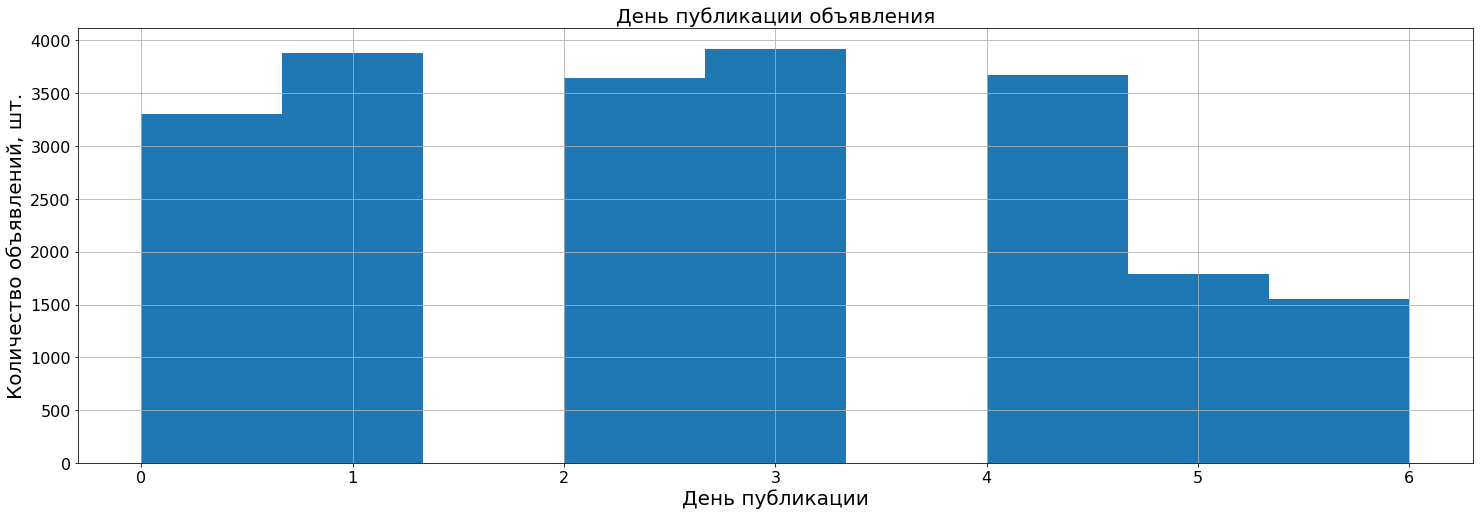

In [80]:
display(data['expositions_day'].describe())
data.hist('expositions_day', figsize=(25, 8), bins = 9);
plt.xlabel('День публикации', fontsize = 20);
plt.ylabel('Количество объявлений, шт.', fontsize = 20);
plt.title('День публикации объявления', fontsize = 20);

Распределение публикаций по будним дням недели примерно одинаково, в то же время на выходных количество новых публикаций существенно ниже.

#### Как быстро продавались квартиры

count    18972.000000
mean       177.917826
std        216.742607
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1572.000000
Name: days_exposition, dtype: float64

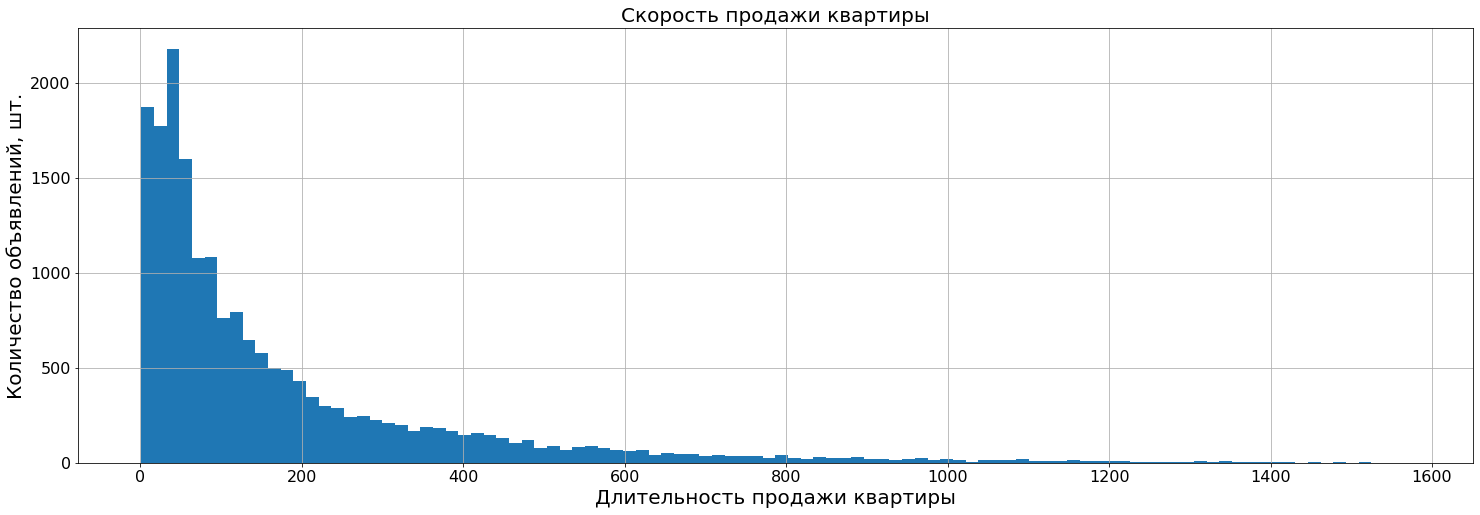

In [81]:
display(data['days_exposition'].describe())
data.hist('days_exposition', figsize=(25, 8), bins = 100);
plt.xlabel('Длительность продажи квартиры', fontsize = 20);
plt.ylabel('Количество объявлений, шт.', fontsize = 20);
plt.title('Скорость продажи квартиры', fontsize = 20);

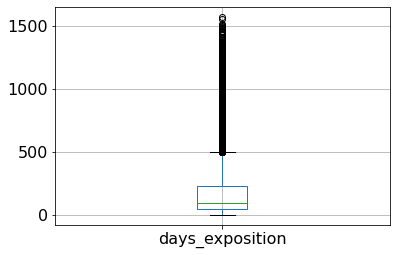

In [82]:
data.boxplot('days_exposition');

Информация о длительности продажи присутствует для 18972 квартир. Средняя длительность продажи составляет 178 дней, при этом медианное значение равно 94 дням. Разброс связан с тем, что в выборки существуют значения, выходящие за 1.5 межквартильного размаха. Длительность продажи, превышающую 500 дней, можно считать достоточно большой.  
25% квартир были проданы в период, не превышающий 44 дня. Продажи, попавшие в этот период, можем считать быстрыми.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

0.7258611219024469

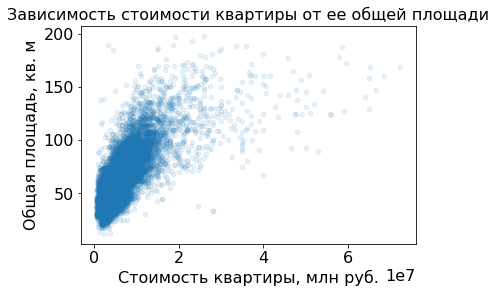

In [83]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Общая площадь, кв. м', fontsize = 16);
plt.title('Зависимость стоимости квартиры от ее общей площади', fontsize = 16);
data['last_price'].corr(data['total_area'])

Коэффициент корреляции между общей площадью квартиры и ее итоговой стоимостью составляет 0.72, что свидетельствует о наличии сильной положительной связи между этими показателями.

0.6231601478834934

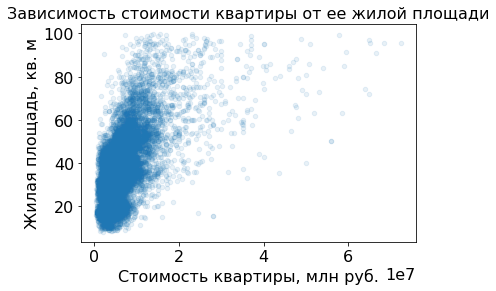

In [84]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Жилая площадь, кв. м', fontsize = 16);
plt.title('Зависимость стоимости квартиры от ее жилой площади', fontsize = 16);
data['last_price'].corr(data['living_area'])

Коэффициент корреляции между жилой площадью квартиры и ее итоговой стоимостью составляет 0.62, что свидетельствует о наличии умеренной положительной связи между этими показателями.

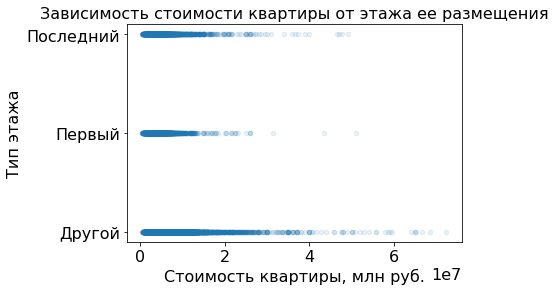

In [85]:
data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Тип этажа', fontsize = 16);
plt.title('Зависимость стоимости квартиры от этажа ее размещения', fontsize = 16);

По графику видим, что стоимость квартир, расположенных на первом этаже, за редким исключением, ниже 2 млн руб., на последнем - в основном не более 3 млн руб. Стоимость квартир, расположенных ни на первом, ни на последнем этажах, имеет больший разброс, цена до 4 млн руб. встречается достаточно часто.  

In [86]:
data['last_price'].corr(data['floor'])

0.06808023296749993

Коэффициент корреляции между жилой площадью квартиры и этажом, на котором она располагается, составляет 0.07, что свидетельствует о наличии очень слабой положительной связи между этими показателями (взаимосвязь практически отсутствует).

0.4210990698291684

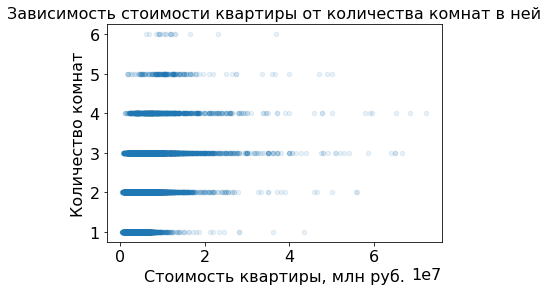

In [87]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Количество комнат', fontsize = 16);
plt.title('Зависимость стоимости квартиры от количества комнат в ней', fontsize = 16);
data['rooms'].corr(data['last_price'])

По большей цене продавались квартиры, размещенные в четверг и пятницу.  
Коэффициент корреляции, составляющий 0,42 говорит о наличии прямой слабой связи между днем размещения объявления и стоимостью, по которой она была продана.

-0.010996046064744741

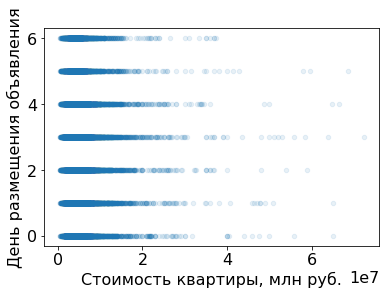

In [88]:
data.plot(x='last_price', y='expositions_day', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('День размещения объявления', fontsize = 16);
data['last_price'].corr(data['expositions_day'])

Коэффициент корреляции, равный -0,01, говорит о том, что взаимосвязь между днем размещения объявления и стоимостью продажи квартиры практически отсутствует.

0.010417984649223727

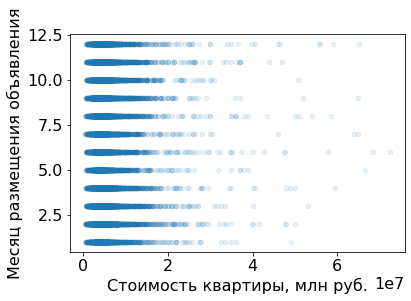

In [89]:
data.plot(x='last_price', y='expositions_month', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Месяц размещения объявления', fontsize = 16);
data['last_price'].corr(data['expositions_month'])

Коэффициент корреляции, равный 0,01, говорит о том, что взаимосвязь между месяцем размещения объявления и стоимостью продажи квартиры практически отсутствует.

-0.04060138120946661

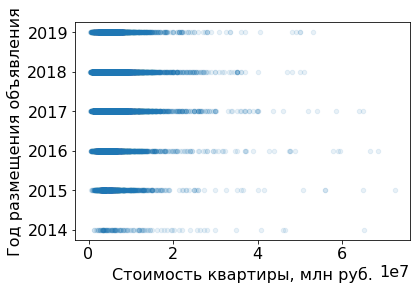

In [90]:
data.plot(x='last_price', y='expositions_year', kind='scatter', alpha=0.1);
plt.xlabel('Стоимость квартиры, млн руб.', fontsize = 16);
plt.ylabel('Год размещения объявления', fontsize = 16);
data['last_price'].corr(data['expositions_year'])

Коэффициент корреляции, равный -0,04, говорит о том, что взаимосвязь между годом размещения объявления и стоимостью продажи квартиры практически отсутствует.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [91]:
# Создадим сводную таблицу путем слияния двух других таблиц
data_city = data.pivot_table(index=['locality_name'], values='last_price', aggfunc='count')
data_city_1 = data_city.reset_index().sort_values('last_price', ascending = False).head(10)
data_city_1 = data_city_1.drop(['last_price'], axis=1) # Создали таблицу с 10 населенными пунктами с наибольшим количеством объявлений
data_city_2 = data.pivot_table(index=['locality_name'], values=['last_price', 'total_area'], aggfunc='mean')
data_city_2.reset_index() # Создали таблицу со средними значениями стоимости и площади продаваемых квартир для каждого населенного пункта
data_city = data_city_1.merge(data_city_2, on='locality_name', how='left', suffixes=('last_price', 'total_area')) # Объединили две таблицы
data_city['mean_price'] = data_city['last_price'] / data_city['total_area'] # Рассчитали среднюю стоимость 1 кв. м
data_city = data_city.sort_values('mean_price') # Отсортировали полученные значения
data_city

,locality_name,last_price,total_area,mean_price
9,Выборг,3.119969e+06,54.386933,57366.148405
4,Всеволожск,3.757024e+06,55.655576,67504.898473
8,Гатчина,3.410511e+06,49.799592,68484.726537
6,Колпино,3.814290e+06,51.874277,73529.506606
3,Шушары,4.083054e+06,53.415190,76439.951493
1,Мурино,3.714207e+06,44.705313,83082.008858
7,Парголово,4.508553e+06,51.385047,87740.561093
2,Кудрово,4.412753e+06,46.956538,93975.273019
5,Пушкин,5.804503e+06,56.396140,102923.760076
0,Санкт-Петербург,6.690393e+06,58.830742,113722.734874


Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная средняя стоимость 1 кв. м площади в Санкт-Петербурге - 113722,74 руб./кв. м, наименьшая - в Выборге, 57366,15 тыс. руб.

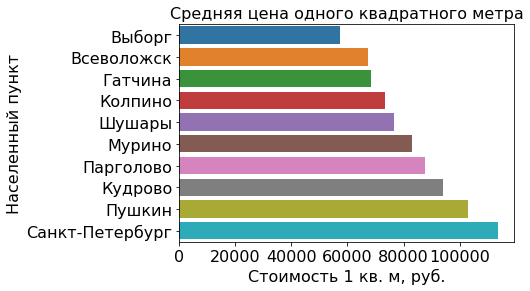

In [92]:
sb.barplot(x='mean_price', y='locality_name', data = data_city);
plt.xlabel('Стоимость 1 кв. м, руб.', fontsize = 16);
plt.ylabel('Населенный пункт', fontsize = 16);
plt.title('Средняя цена одного квадратного метра', fontsize = 16);


#### Средняя стоимость каждого километра

In [93]:
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb = data_spb.reset_index()

In [94]:
data_spb['km_to_center_prices'] = data_spb['sqare_meter_price'] / data_spb['cityCenters_nearest_in_km']

-0.3379975701196223

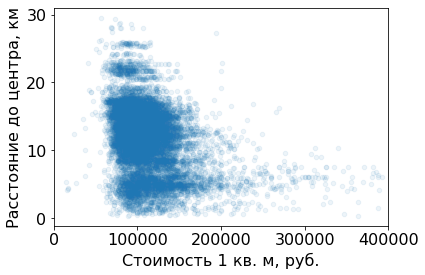

In [95]:
data_spb.plot(x='sqare_meter_price', y='cityCenters_nearest_in_km', kind='scatter', alpha=0.08);
plt.xlabel('Стоимость 1 кв. м, руб.', fontsize = 16);
plt.xlim(0, 400000)
plt.ylabel('Расстояние до центра, км', fontsize = 16);
data_spb['sqare_meter_price'].corr(data_spb['cityCenters_nearest_in_km'])

Коэффициент корреляции, равный -0,34, позвоялет сделать вывод о наличии обратной слабой связи между расстоянием до центра города и стоимостью 1 квадратного метра. Таким образом, чем квартира ближе к центру, тем, при прочих равных условиях, выше ее стоимость.

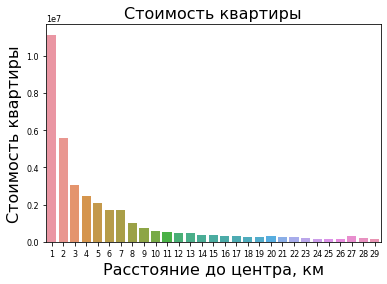

In [98]:
data_spb['cityCenters_nearest_in_km_round'] = data_spb['cityCenters_nearest_in_km'].round(0)
data_spb = data_spb.loc[data_spb['cityCenters_nearest_in_km_round'] > 0]
data_spb['cityCenters_nearest_in_km_round'] = data_spb['cityCenters_nearest_in_km_round'].astype(int)
data_spb_calc = data_spb.pivot_table(index=['cityCenters_nearest_in_km_round'], 
                                     values='last_price',
                                     aggfunc='mean')
data_spb_calc = data_spb_calc.reset_index()
data_spb_calc['km_price'] = data_spb_calc['last_price'] / data_spb_calc['cityCenters_nearest_in_km_round']
sb.barplot(x='cityCenters_nearest_in_km_round', y='km_price', data = data_spb_calc);
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.xlabel('Расстояние до центра, км', size= 16 , weight= 100);
plt.ylabel('Стоимость квартиры', size= 16, weight= 100);
plt.title('Стоимость квартиры', size= 16, weight= 100);

В основном средняя стоимость продаваемых квартиры уменьшается по мере удаления их от центра. Таким образом, наш вывод оказался верным.

### Общий вывод

В рамках проведенного исследования нами были проанализированы объявления о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах.  
В ходе исследования мы заполнили пропуски в данных там, где это было возможно, очистили данные от аномальных значений.  
Нами были рассчитаны дополнительные показатели для анализа данных.  
Установлено, какие факторы больше всего влияют на общую (полную) стоимость объекта. Среди рассмотренных показателей наибольшее влияние на итоговую стоимость объекта недвижимости оказывает общая плозадь помещения, жилая площадь и площадь кухни. В свою очередь даты размещения объявлений не оказывали влияния на стоимость объекта недвижимости - ни день, ни месяц, ни год (что звучит достаточно логично и подтверждает, что данные после наших преобразований остались корректными).  
Кроме этого, мы выяснили, что быстрой является продажа квартиры в период до 44 дней со дня публикации объявления, а вот период, превышающий 500 дней, является достаточно долгим.  
Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная средняя стоимость 1 кв. м площади в Санкт-Петербурге - 113722,74 руб./кв. м, наименьшая - в Выборге, 57366,15 тыс. руб.  
Также мы выяснили, чем квартира ближе к центру, тем, при прочих равных условиях, выше ее стоимость.